# Exercise

Use the code in this notebook to complete the following exercises:

1. For `df1`:

    - Take a look at the data in `df1`.
    - Does `x` increase from time one to time two?
    - Visualize the relationship between `x` and `time`.
    - Run a statistical test to further examine the relationship between these features.
    
 1. For `df2`:
 
    - Take a look at the data in `df2`.
    - Visualize the relationship between `x` and `y`.
    - How would you describe the relationship between `x` and `y`?
    - Run a statistical test to examine the relationship between `x` and `y`.

1. For `df3`:

    - Take a look at the data in `df3`
    - Which surgeon has the higher success rate?
    - If you had to have heart bypass surgery, which surgeon would you go to?

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')

#### Question 1: Work with DF1 to answer the following questions
* Does x increase from time one to time two?

In [2]:
df1.head() 

,group,x,time
0,a,7.087113,one
1,a,5.164441,one
2,a,6.150206,one
3,a,3.732648,one
4,a,5.181035,one


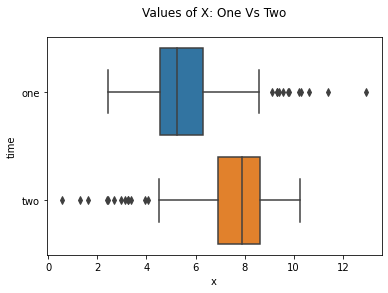

In [11]:
sns.boxplot(data = df1, x='x', y='time')
plt.title('Values of X: One Vs Two\n')
None

Looking at the IQR's, min, max, and median values I would conclude that the values of x do increase from one to two

* Visualize the relationship between x and time

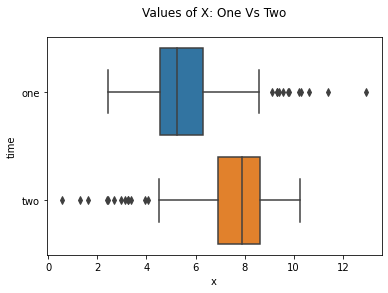

In [17]:
sns.boxplot(data = df1, x='x', y='time')
plt.title('Values of X: One Vs Two\n')
None

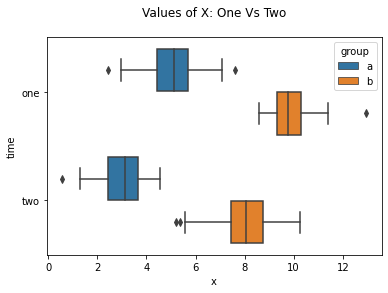

In [18]:
sns.boxplot(data = df1, x='x', y='time', hue = 'group')
plt.title('Values of X: One Vs Two\n')
None

* Run a statistical test to examine the relationship between these features

##### Tailed T Test's

$H_0$: X and time are independent of each other.

$H_a$: X and time have a significant relationship and are directly effected by each other.

In [ ]:
alpha = 0.05

In [19]:
## making our subgroups

one = df1[df1.time == 'one']
two = df1[df1.time == 'two']

In [21]:
## running our two tailed t test

t, p = stats.ttest_ind(one.x, two.x)

t, p

(-5.443902721870272, 1.5320971681720527e-07)

Given our p value being incredible low and close to zero. We can conclude that x and time are impacted by one another and have a significant relationship

#### Question 2: Work with DF2 to answer the following questions

In [22]:
## taking a look at the data in df2

df2.head()

,x,y,group
0,101.243108,597.915453,a
1,107.492036,579.638663,a
2,105.348935,614.607337,a
3,99.981116,607.082320,a
4,102.764199,606.082835,a


* Visualize the relationship between x and y.

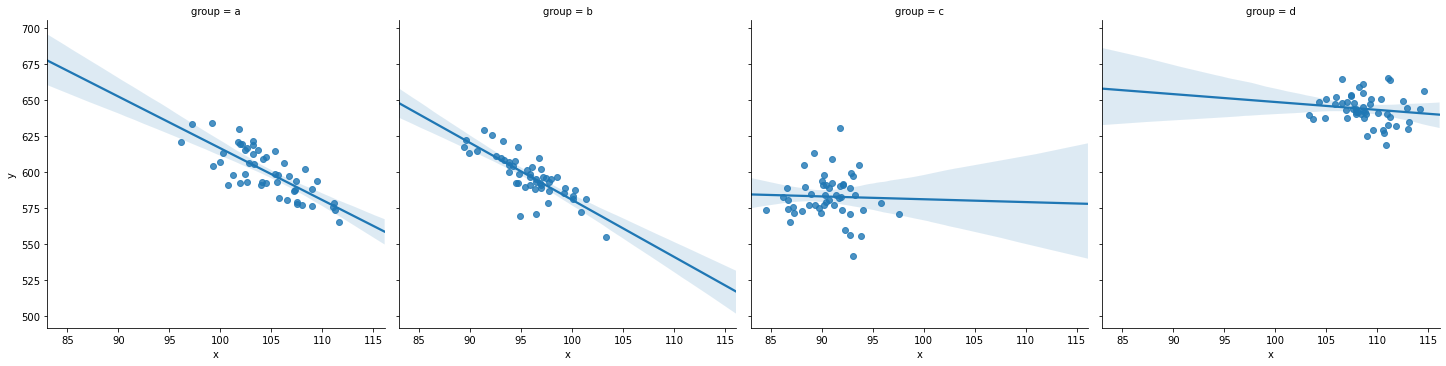

In [42]:
sns.lmplot(x= 'x', y = 'y', data = df2, col = 'group', truncate = False)

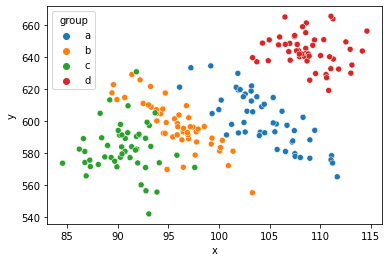

In [26]:
sns.scatterplot(data = df2, x = 'x', 
                y = 'y', hue = 'group')
None

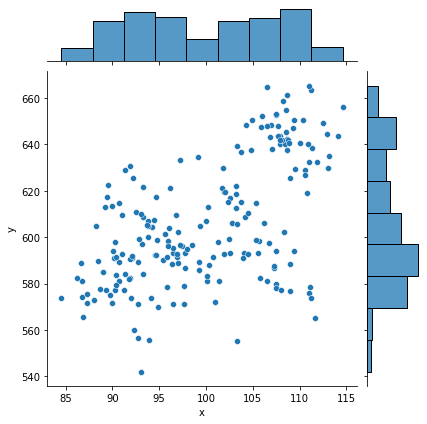

In [27]:
sns.jointplot(x='x', y='y', data=df2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Looking at the different graphs for the relationship between x and y we can conclude there is slightly positive linear correlation

The group column also appears to form clusters when using it as a hue

* Run a statistical test to examine the relationship between x and y.

##### Pearson's R Correlation Test

In [29]:
alpha = 0.05

$H_0$ : There is no significant relationship between x and y's appearence of a positive correlation 

$H_a$ : There is evidence to suggest there is significance bewtween the positive linear realtionhip for x and y

In [28]:
corr, p = stats.pearsonr(df2.x, df2.y)
corr, p

(0.5693902765694359, 1.3960403186191819e-18)

Given that the p value returned is near zero and we have a correlation of 0.57. We can conclude these variables do have a significant positive linear relationship

#### Question 3: Work with DF3 to answer the following questions

In [30]:
df3.head() ## <-- previewing df3

,surgeon,surgery,success
0,A,appendectomy,1
1,B,appendectomy,1
2,A,heart bypass,0
3,A,appendectomy,1
4,A,heart bypass,1


* Which surgeon has the higher success rate?

In [31]:
def observe_cross(x, y):
    '''
    This function is designed to create a crosstab of two variables
    '''
    
    ctab = pd.crosstab(x, y)
    ctab = ctab.sort_values(by = 1, ascending = False)
    
    return ctab

In [32]:
observe_cross(df3.surgeon, df3.success) ## looking at our crosstab using our function

success,0,1
surgeon,,
A,59,421
B,144,376


Surgeon A has a higher success rate

* If you had to have heart bypass surgery, which surgeon would you go to?

In [35]:
## creating our sub dataframe for heart bypass surgery

heart = df3[df3.surgery == 'heart bypass']

heart.head()

,surgeon,surgery,success
2,A,heart bypass,0
4,A,heart bypass,1
7,B,heart bypass,1
8,B,heart bypass,1
12,A,heart bypass,1


In [36]:
observe_cross(heart.surgeon, heart.success)

success,0,1
surgeon,,
B,137,281
A,34,65


In [39]:
heart.groupby('surgeon').mean('success')

,success
surgeon,
A,0.656566
B,0.672249


Surgeon B has a higher heart bypass surgery success rate so I would go to them